# 第2回のコード

資料はMATLABコードだが、ここではJuliaでの実装をする。

Chebyshev(-Lobatto) pointsは次のように複素平面上の単位円の上半分を$n$等分した点の実部で得られる。なおこのコードの実行の前に以下のパッケージをインストールする必要がある。

```
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("ApproxFun")
Pkg.add("SpecialFunctions")
Pkg.add("LaTeXStrings")
Pkg.add("FFTW")

```

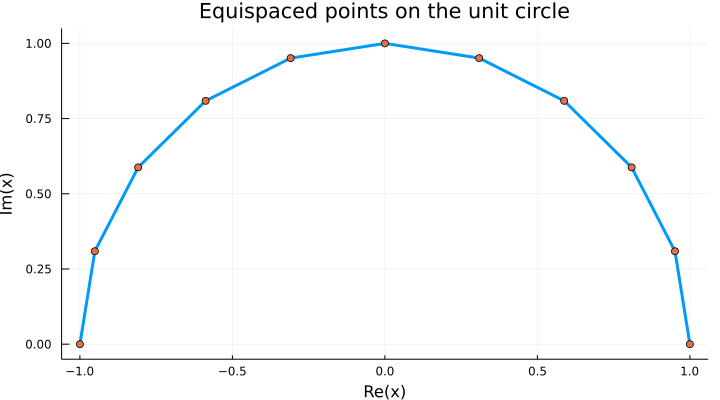

In [1]:
using Plots
n = 10
θⱼ = range(0, stop=π, length=n+1)
zⱼ = exp.(im * θⱼ)
plot(zⱼ,
    xlabel     = "real",                            # X軸のラベル
    ylabel     = "imaginary part",                       # Y軸のラベル
    ylims      = (-0.05,1.05),                           # Y軸の範囲
    line       = 3,                                      # 線幅
    title      = "Equispaced points on the unit circle", # タイトル
    size       = (720,400),                              # プロットのサイズ
    legend     = false,                                  # 凡例は今回は消す
)
scatter!(zⱼ)

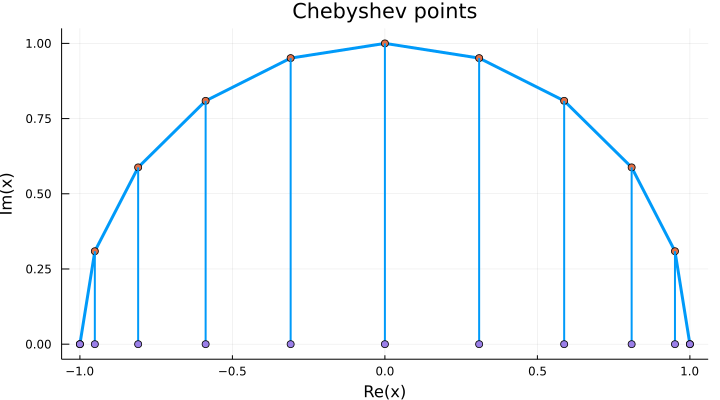

In [2]:
xⱼ = real(zⱼ)
for j = 2:n
    plot!([xⱼ[j];zⱼ[j]],
        line = 2,
        color = 1,
        title      = "Chebyshev points",
    )
end
scatter!(xⱼ.+0im)

Chebyshev点上と$n$次Chebyshev多項式を重ねてみると、Chebyshev点上でChebyshev多項式は極値をとる。

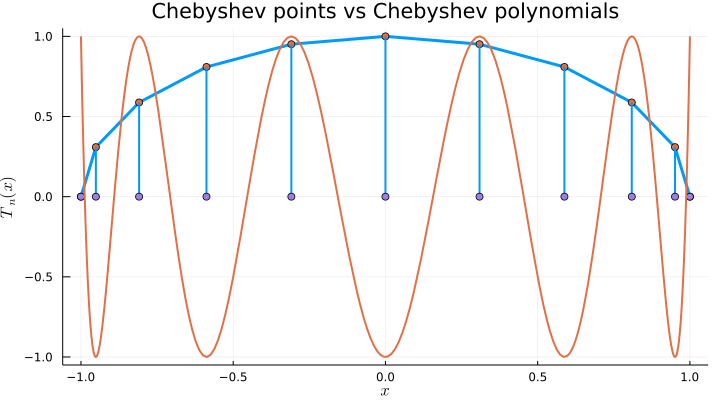

In [3]:
using ApproxFun
Tₙ = Fun(Chebyshev(),[zeros(n);1.])
plot!(Tₙ, -1,1,
    line = 2,
    color = 2,
    title      = "Chebyshev points vs Chebyshev polynomials",
    xlabel     = "\$x\$",
    ylabel     = "\$T_n(x)\$",
    ylims      = (-1.05,1.05),
)

次のコードはChebyshev級数の計算方法の一例になる。

$$
    f(x) = \exp(\mathrm{erf}(x^2)+x^5)\sin(5\pi x) + x
$$

として

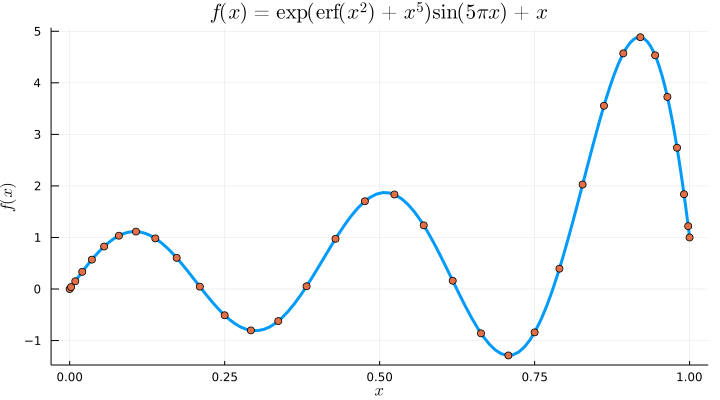

In [4]:
using SpecialFunctions, LaTeXStrings
# x = Fun(identity,Chebyshev(0..1))
fc = Fun(x->exp(erf(x^2)+x.^5).*sin(5*pi*x) + x,Chebyshev(0..1),34)
n = ncoefficients(fc) - 1
# 
plot(fc,
    xlabel     = "\$x\$",
    ylabel     = "\$f(x)\$",
    line       = 3,
    title      = "\$f(x) = \\exp(\\mathrm{erf}(x^2)+x^5)\\sin(5\\pi x) + x\$", # タイトル
    size       = (720,400),
    legend     = false,
)
function chebpts(n, t1, t2)
    θⱼ = range(0, stop=π, length=n+1)
    zⱼ = exp.(im * θⱼ)
    xⱼ = real(zⱼ)
    return (1. .- xⱼ).*t1./2 + (1. .- xⱼ).*t2./2
end
cpts = chebpts(n,0,1)
fvals = fc.(cpts)
scatter!(cpts,fvals)

Chebyshev点における関数値からChebyshev級数の係数を計算する。

In [5]:
using FFTW
# 
valsUnitDisc = [reverse(fvals); fvals[2:end-1]]
FourierCoeffs = real(fft(valsUnitDisc))
ChebCoeffs = FourierCoeffs[1:n+1]/n
ChebCoeffs[1] = ChebCoeffs[1]/2
ChebCoeffs[end] = ChebCoeffs[end]/2
# 
reshape([ChebCoeffs; coefficients(fc)],n+1,2)

34×2 Matrix{Float64}:
  1.11284       1.11284
  1.23926       1.23926
  0.803746      0.803746
  0.125482      0.125482
 -0.44867      -0.44867
 -0.669211     -0.669211
 -1.40541      -1.40541
 -0.328482     -0.328482
  0.506769      0.506769
  0.151818      0.151818
 -0.0776222    -0.0776222
 -0.0205652    -0.0205652
  0.00906977    0.00906977
  ⋮            
 -1.27081e-8   -1.27081e-8
  2.07755e-9    2.07755e-9
  6.26727e-10   6.26727e-10
 -9.7447e-11   -9.74471e-11
 -2.46978e-11  -2.46978e-11
  3.41942e-12   3.41936e-12
  2.03163e-13   2.03132e-13
 -2.52911e-13  -2.52791e-13
  2.73385e-14   2.74813e-14
  2.21904e-14   2.22175e-14
 -1.24395e-15  -1.03185e-15
 -1.80327e-15  -1.65227e-15

In [6]:
S = Chebyshev(0..1)
p = points(S,n+1)
v = exp.(erf.(p.^2) .+ p.^5) .* sin.( 5π.*p) .+ p
f = Fun(S,ApproxFun.transform(S,v))
reshape([ChebCoeffs; coefficients(fc); coefficients(f)],n+1,3)

34×3 Matrix{Float64}:
  1.11284       1.11284       1.11284
  1.23926       1.23926       1.23926
  0.803746      0.803746      0.803746
  0.125482      0.125482      0.125482
 -0.44867      -0.44867      -0.44867
 -0.669211     -0.669211     -0.669211
 -1.40541      -1.40541      -1.40541
 -0.328482     -0.328482     -0.328482
  0.506769      0.506769      0.506769
  0.151818      0.151818      0.151818
 -0.0776222    -0.0776222    -0.0776222
 -0.0205652    -0.0205652    -0.0205652
  0.00906977    0.00906977    0.00906977
  ⋮                          
 -1.27081e-8   -1.27081e-8   -1.27081e-8
  2.07755e-9    2.07755e-9    2.07755e-9
  6.26727e-10   6.26727e-10   6.26727e-10
 -9.7447e-11   -9.74471e-11  -9.74471e-11
 -2.46978e-11  -2.46978e-11  -2.46978e-11
  3.41942e-12   3.41936e-12   3.41936e-12
  2.03163e-13   2.03132e-13   2.03132e-13
 -2.52911e-13  -2.52791e-13  -2.52791e-13
  2.73385e-14   2.74813e-14   2.74813e-14
  2.21904e-14   2.22175e-14   2.22175e-14
 -1.24395e-15  -1.03185